In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# Enable inline plotting
%matplotlib inline

In [4]:
# Load the dataset
df = pd.read_csv("Advertising.csv")

In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [6]:
# Check for null and duplicated values
print(f"Null values:\n{df.isnull().sum()}")
print(f"Duplicated values: {df.duplicated().sum()}")
print(f"Unique values per column:\n{df.nunique()}")

Null values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
Duplicated values: 0
Unique values per column:
Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64


In [7]:
# Descriptive Statistics Analysis
print(df.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [8]:
# Deleting the unnamed column as it is not needed
df.drop(columns="Unnamed: 0", inplace=True)

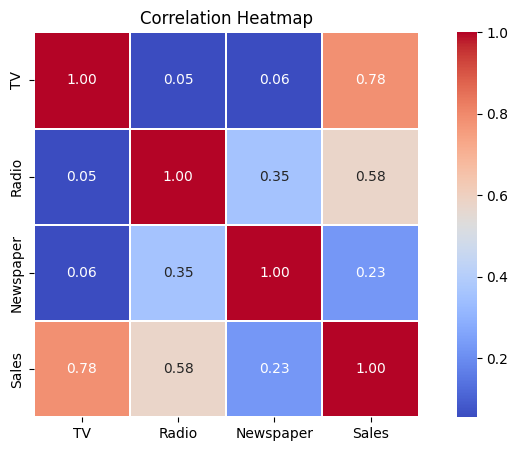

In [9]:
# Correlation Heatmap visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x600 with 0 Axes>

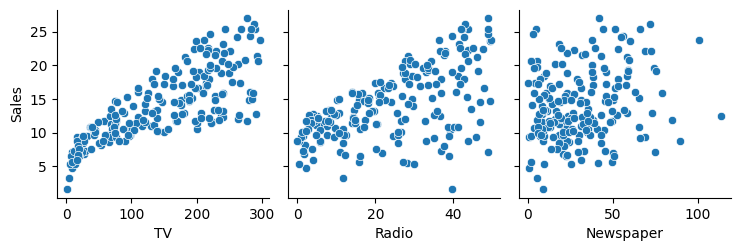

In [10]:
# Pairplot for visualizing relationships between variables
plt.figure(figsize=(10, 6))
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()

In [11]:
# Defining dependent variable
dependent_variable = 'Sales'
print(f"Skew of the dependent variable: {df[dependent_variable].skew()}")

Skew of the dependent variable: 0.4075714250767127


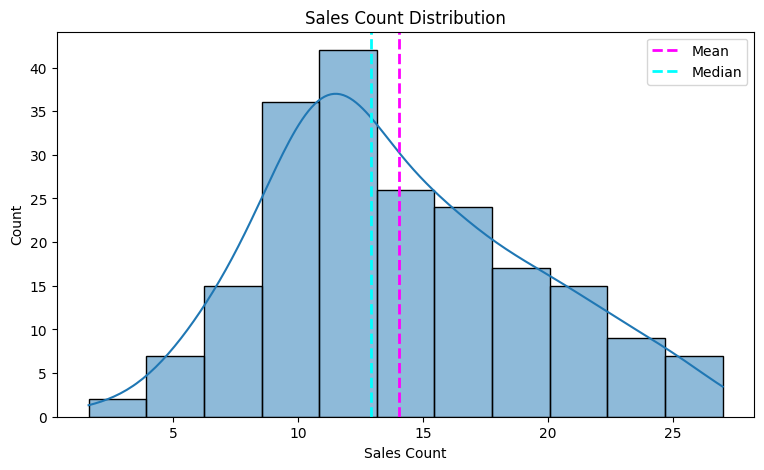

In [12]:
# Visualizing the distribution of the dependent variable - Sales
plt.figure(figsize=(9, 5))
sns.histplot(df[dependent_variable], kde=True)
plt.axvline(df[dependent_variable].mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df[dependent_variable].median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.legend()
plt.show()

In [13]:
# Defining dependent and independent variables
X = df.drop('Sales', axis=1).values
y = df['Sales'].values.reshape(-1, 1)

In [14]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# Standardizing the feature values
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [16]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_s, y_train)

LinearRegression()

In [17]:
# Fitting the model and making predictions
y_pred = linear_model.predict(X_test_s)

In [18]:
# Evaluation metrics for Linear Regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, linear_model.predict(X_train_s))
r2_test = r2_score(y_test, y_pred)

In [19]:
# Printing Evaluation Metrics
print("Linear Regression Evaluation Metrics:")
print("MSE :", mse)
print("RMSE :", rmse)
print("Train R2 :", r2_train)
print("Test R2 :", r2_test)

Linear Regression Evaluation Metrics:
MSE : 3.174097353976106
RMSE : 1.7815996615334506
Train R2 : 0.8957008271017818
Test R2 : 0.8994380241009119


In [20]:
# DataFrame for actual vs predicted values
linr = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten()})
print(linr.head())

   actual  predicted
0    16.9  16.408024
1    22.4  20.889882
2    21.4  21.553843
3     7.3  10.608503
4    24.7  22.112373


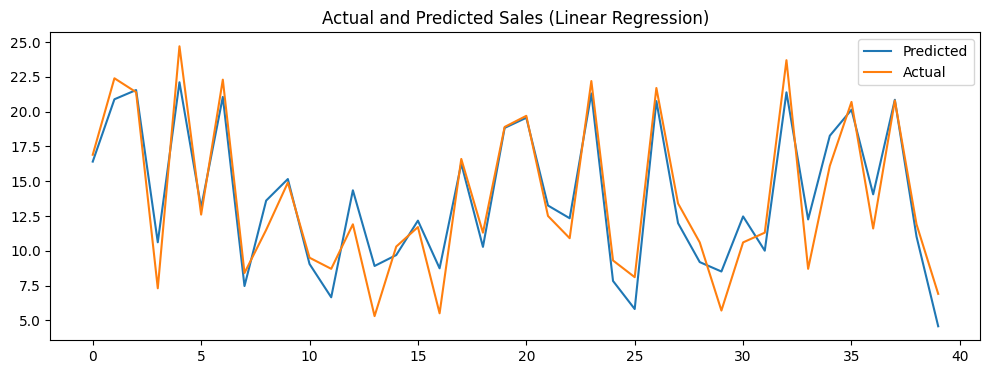

In [21]:
# Plotting actual and predicted values for Linear Regression
plt.figure(figsize=(12, 4))
plt.plot(y_pred[:100], label='Predicted')
plt.plot(y_test[:100], label='Actual')
plt.legend()
plt.title('Actual and Predicted Sales (Linear Regression)', fontsize=12)
plt.show()

In [22]:
# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(X_train_s, y_train.flatten())  # Ensure y_train is 1D

RandomForestRegressor()

In [23]:
# Making predictions
forest_pred = random_forest.predict(X_test_s)

In [24]:
# Evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, forest_pred)
rmse_rf = np.sqrt(mse_rf)
r2_train_rf = r2_score(y_train, random_forest.predict(X_train_s))
r2_test_rf = r2_score(y_test, forest_pred)

In [25]:
# Printing Evaluation Metrics
print("\nRandom Forest Regression Evaluation Metrics:")
print("MSE RF :", mse_rf)
print("RMSE RF :", rmse_rf)
print("Train R2 RF :", r2_train_rf)
print("Test R2 RF :", r2_test_rf)


Random Forest Regression Evaluation Metrics:
MSE RF : 0.5794779499999982
RMSE RF : 0.7612344908108133
Train R2 RF : 0.9964800749433708
Test R2 RF : 0.9816409387793493


In [26]:
# DataFrame for actual vs predicted values
data_frame_rf = pd.DataFrame({'actual': y_test.flatten(), 'predicted': forest_pred.flatten()})
print(data_frame_rf.head())

   actual  predicted
0    16.9     17.698
1    22.4     21.769
2    21.4     20.811
3     7.3      6.750
4    24.7     23.250


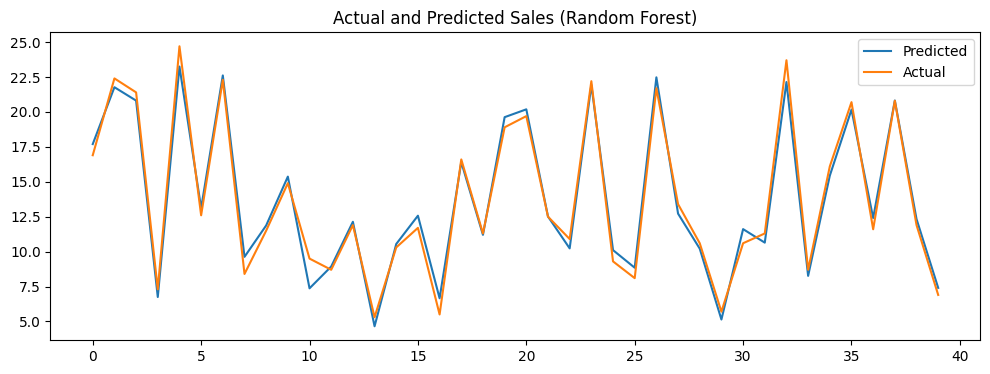

In [27]:
# Plotting actual and predicted values for Random Forest
plt.figure(figsize=(12, 4))
plt.plot(forest_pred[:100], label='Predicted')
plt.plot(y_test[:100], label='Actual')
plt.legend()
plt.title('Actual and Predicted Sales (Random Forest)', fontsize=12)
plt.show()